In [291]:
import scanpy as sc
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

import pandas as pd
import matplotlib.pyplot as plt

# allow inline plots
%matplotlib inline 

In [184]:
# load in the pre-computed counts data
counts = sc.read_10x_h5("sample1/outs/filtered_feature_bc_matrix.h5")



/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


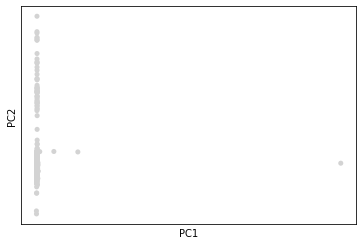

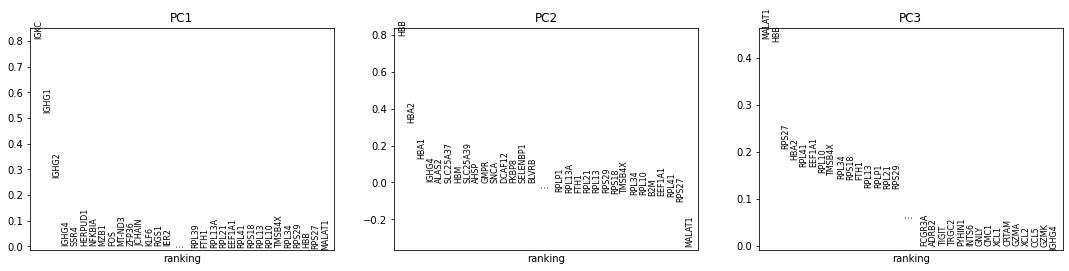

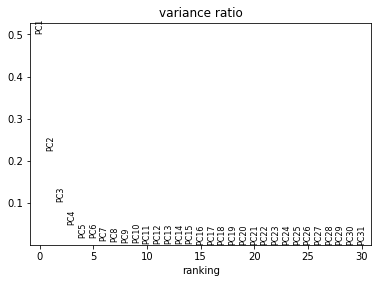

In [185]:
sc.pp.pca(counts)  # run PCA
sc.pl.pca_overview(counts)  # Plot first 2 PCs and breakdowns

#### PC overview

- PC1 is dominated by antibody genes
- PC2 is mainly hemoglobin subunits

![PCA1](figures/PCA1.png)

![topgenes1](figures/topgenes1.png)

In [103]:
sc.pp.normalize_per_cell(counts, 
                         counts_per_cell_after=1e6)

/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


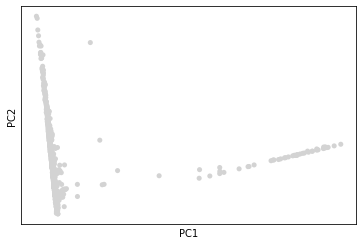

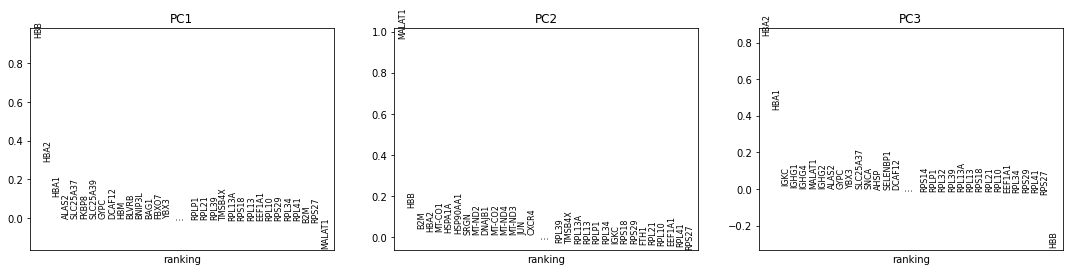

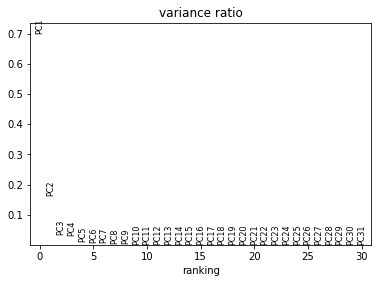

In [138]:
# after normalization
sc.pp.pca(counts)  # run PCA
sc.pl.pca_overview(counts)  # Plot first 2 PCs and breakdowns

#### PC overview

- PCs 1 and 3 are driven by hemoglobin
- PC2 is dominated by MALAT a lncRNA implicated in a few biological processes
![PCA2](figures/PCA2.png)

![topgenes2](figures/topgenes2.png)

In [230]:
plt.hist(counts.obsm['X_pca'][:, 0], bins=1000)

# histogram of PC1

it looks like a few exreme outliers are dominating the signal

![PCA1](figures/hist1.png)


In [158]:
# filter out cells with outlier PC vals. These are probably erythrocytes

non_heme = counts.obsm['X_pca'][:, 0] < 500000
genes_to_exclude = ['HBB', 'HBA1', 'HBA2'] 
genes_to_keep = ~counts.var.index.isin(genes_to_exclude)

filtered_counts = counts[non_heme, genes_to_keep]


In [159]:
sc.tl.pca(filtered_counts)

/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


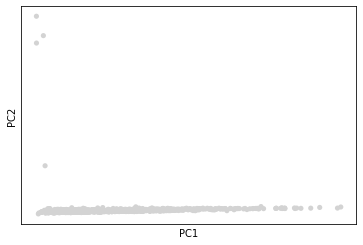

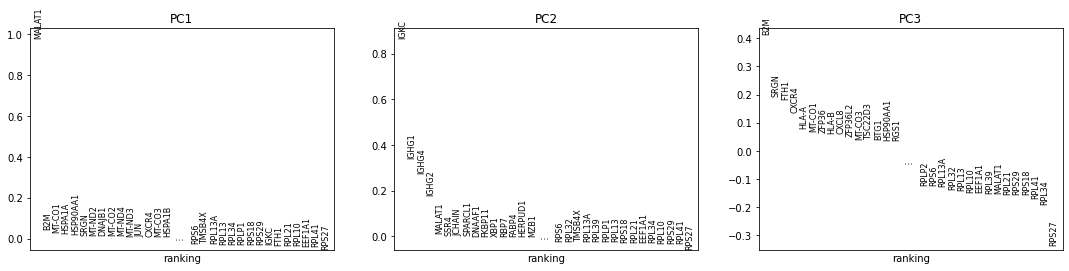

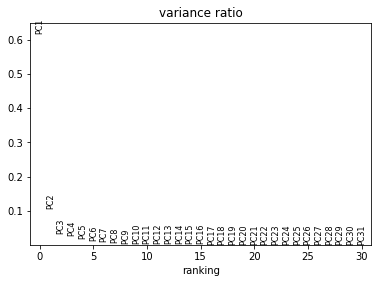

In [160]:
sc.pl.pca_overview(filtered_counts)

(array([  1.,   0.,   0.,   1.,   2.,   6.,   5.,   8.,  26.,  39.,  70.,
        104., 108., 107., 106., 104.,  98.,  54.,  41.,  30.,  35.,  20.,
         23.,  33.,  29.,  15.,  13.,  24.,  11.,   8.,   2.,   2.,   2.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

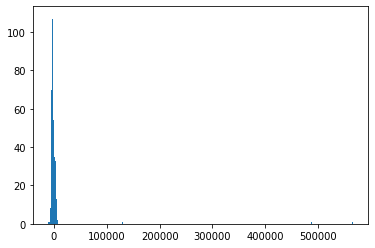

In [164]:
plt.hist(filtered_counts.obsm['X_pca'][:, 1], bins=1000)

# PCs after filtering

- PC1 is dominated by MALAT1, which has a broad spread
- PC2 separates out a small number of high antibody expressing cells

**PC2**
![hist2](figures/hist2.png)

In [167]:
# filter by PC2 to illiminate a small number of IG expressing cells
# remove the genes from analysis too

non_IG = filtered_counts.obsm['X_pca'][:, 1] < 20000
genes_to_exclude = ['IGKC', 'IGHG1', 'IGHG4', 'IGHG2'] 
genes_to_keep = ~filtered_counts.var.index.isin(genes_to_exclude)

filtered_counts_IG = filtered_counts[non_IG, genes_to_keep]

In [168]:
sc.tl.pca(filtered_counts_IG)

/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


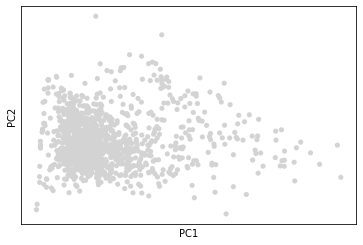

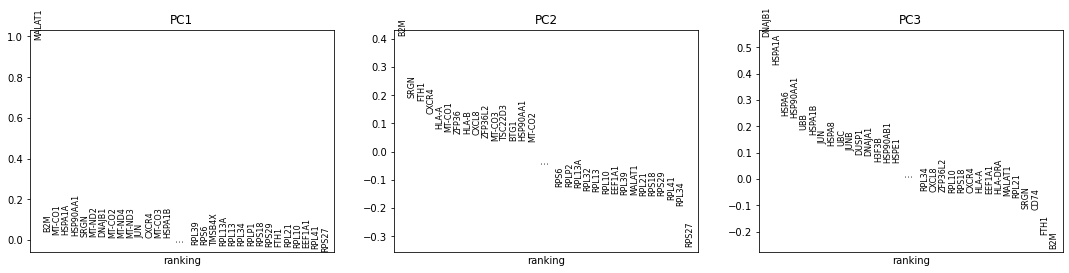

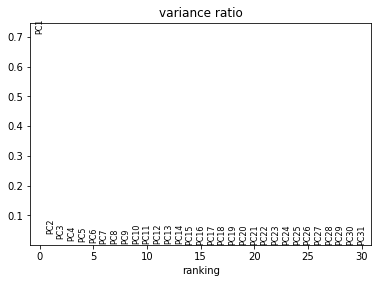

In [169]:
sc.pl.pca_overview(filtered_counts_IG)

In [173]:
# filter out MALAT1.

genes_to_exclude = ['MALAT1'] 
genes_to_keep = ~filtered_counts_MALAT.var.index.isin(genes_to_exclude)

filtered_counts_MALAT = filtered_counts_MALAT[:, genes_to_keep]

In [174]:
sc.tl.pca(filtered_counts_MALAT)

/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


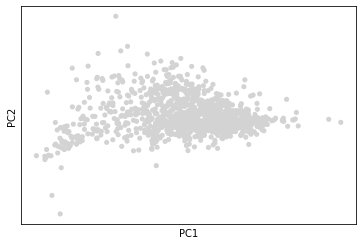

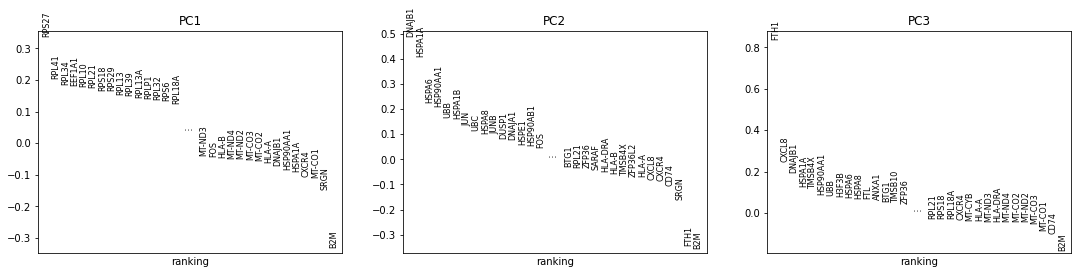

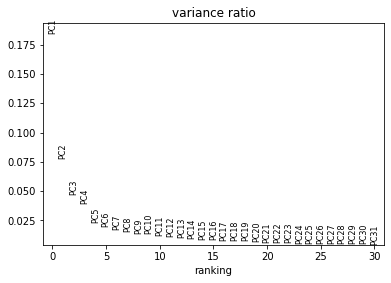

In [176]:
sc.pl.pca_overview(filtered_counts_MALAT)

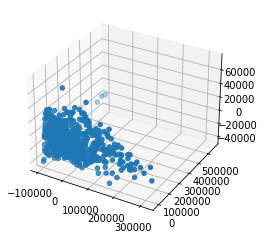

In [179]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(
    filtered_counts.obsm['X_pca'][:, 0], 
    filtered_counts.obsm['X_pca'][:, 1], 
    filtered_counts.obsm['X_pca'][:, 2], 
    'green')

**after outlier removal**
![p3d1](figures/p3d1.png)

/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


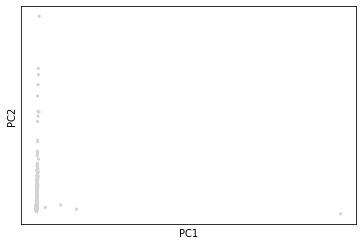

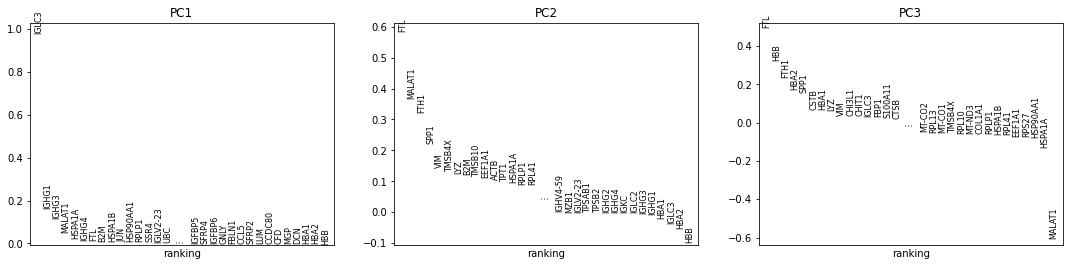

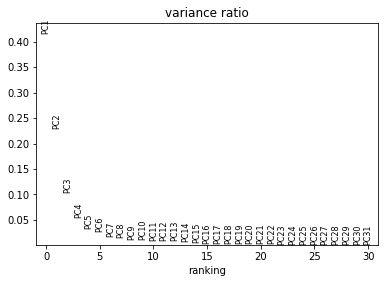

In [190]:
# repeat the above steps for more samples

counts_s5 = sc.read_10x_h5("sample5/outs/filtered_feature_bc_matrix.h5")
sc.pp.pca(counts_s5)  # run PCA
sc.pl.pca_overview(counts_s5)  # Plot first 2 PCs and breakdowns


/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ate50eggs/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


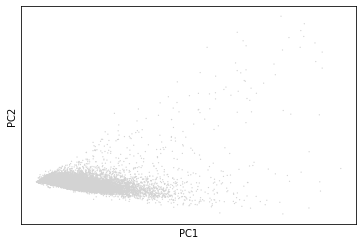

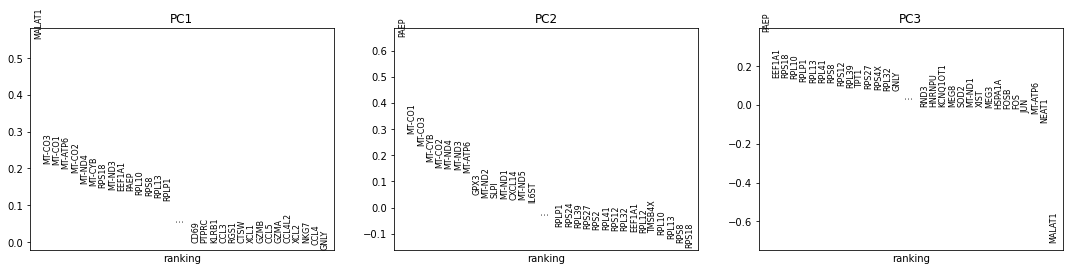

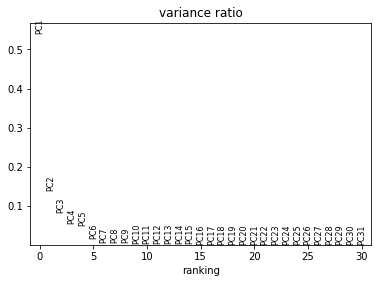

In [189]:
# repeat the above steps for more samples

counts_s32 = sc.read_10x_h5("sample32/outs/filtered_feature_bc_matrix.h5")
sc.pp.pca(counts_s32)  # run PCA
sc.pl.pca_overview(counts_s32)  # Plot first 2 PCs and breakdowns

### other samples

- Sample 5 has different outlier than sample 1, but looks similar
- Sample 32 has a totally different distribution.
- In Sample 32 PCs 2 and 3 are both dominated by PAEP, an endometrial gene

**sample 5**
![a](figures/PCA3.png)
![b](figures/topgenes3.png)

**sample 32**
![c](figures/PCA4.png)
![d](figures/topgenes4.png)



(array([2.9400e+02, 1.7623e+04, 5.9500e+02, 6.6000e+01, 2.1000e+01,
        2.0000e+01, 1.4000e+01, 9.0000e+00, 9.0000e+00, 4.0000e+00]),
 array([-393.13275146, -145.15370178,  102.82534027,  350.80438232,
         598.78344727,  846.76245117, 1094.74157715, 1342.72058105,
        1590.69958496, 1838.67871094, 2086.65771484]),
 <BarContainer object of 10 artists>)

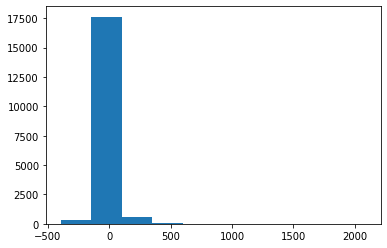

In [206]:
plt.hist(counts_s32.obsm['X_pca'][:, 1])

In [365]:
# focus on high PAEP expressing cells
paep_pos = counts_s32.obsm['X_pca'][:, 1] > 750 
counts_paep = counts_s32[paep_pos,:]


(63, 36601)

/home/ate50eggs/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


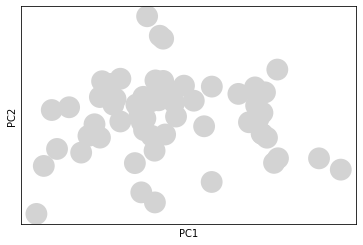

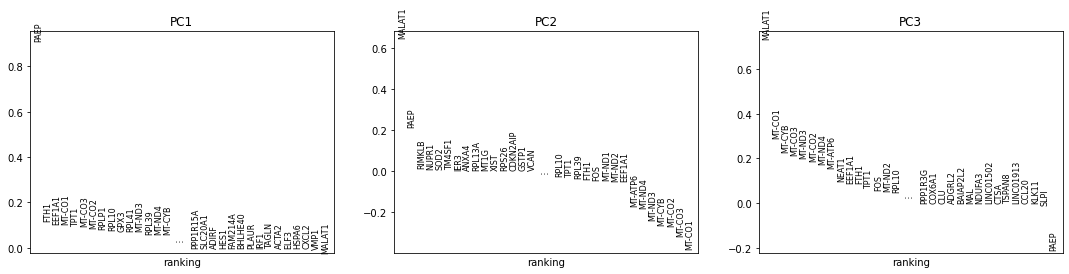

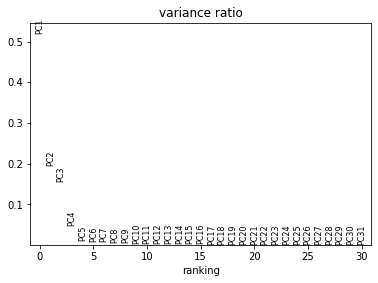

In [347]:
sc.pp.pca(counts_paep)  # run PCA
sc.pl.pca_overview(counts_paep)  # Plot first 2 PCs and breakdowns

In [366]:
# this includes 3 that aren't in the data
#genes_of_interest = pd.read_csv("network.tsv", sep = "\t", header=None)

genes_of_interest = [
    'WNT4', 'GREB1', 'ETAA1', 'IL1A', 'KDR', 
    'ID4', 'VEZT', 'PECAM1', 'VEGFA', 'IL1B', 
    'IL1R2', 'IL1R1', 'ITGB3', 'FLT1', 'VEGFC', 
    'CDH5', 'PGF', 'CTNNB1', 'NRP2', 'IQGAP1', 'SH2D2A', 
    'SHC1', 'NCK1', 'NRP1']

counts_s32.raw = counts_s32
counts_paep.raw = counts_paep


In [370]:
all_goi = counts_s32.raw.X[:,counts_s32.raw.var_names.isin(genes_of_interest)]
paep_goi = counts_paep.raw.X[:,counts_paep.raw.var_names.isin(genes_of_interest)]


In [371]:
all_goi_average = np.array(np.mean(all_goi, axis=0)).flatten()
paep_goi_average = np.array(np.mean(paep_goi, axis=0)).flatten()



In [372]:
paep_goi.shape

(63, 24)

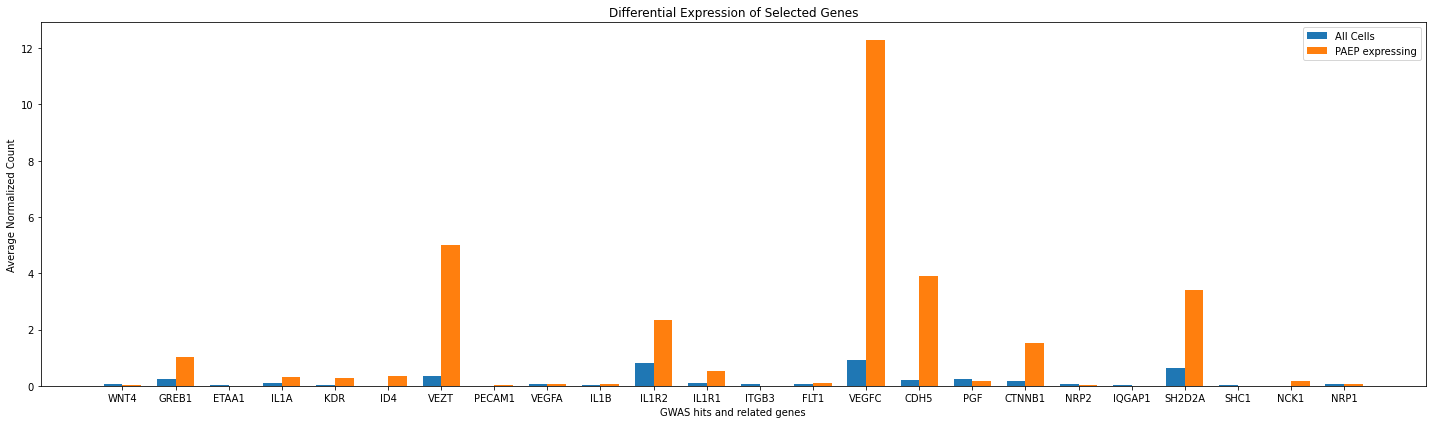

In [374]:
plt.figure(figsize=(20, 6))
bar_width = 0.35
index = np.arange(len(genes_of_interest))

bar1 = plt.bar(index, all_goi_average, bar_width, label='All Cells')
bar2 = plt.bar(index + bar_width, paep_goi_average, bar_width, label='PAEP expressing')

plt.xlabel('GWAS hits and related genes')
plt.ylabel('Average Normalized Count')
plt.title('Differential Expression of Selected Genes')
plt.xticks(index + bar_width / 2, genes_of_interest)
plt.legend()
plt.tight_layout()

TypeError: only size-1 arrays can be converted to Python scalars

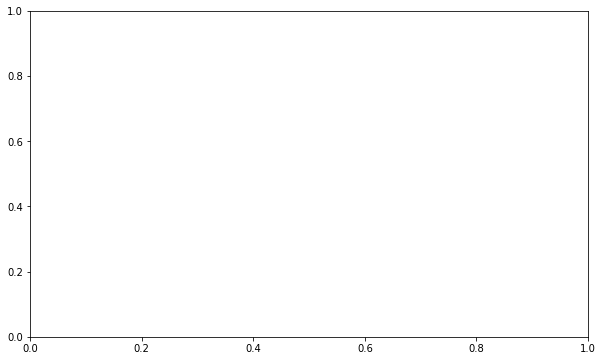

(18655, 1)